In [1]:
import os 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import mediapipe as mp
import time

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )  

In [12]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
print(len(results.left_hand_landmarks.landmark)
,len(results.right_hand_landmarks.landmark)
,len(results.pose_landmarks.landmark))

21 21 33


In [15]:
draw_landmarks(frame, results)

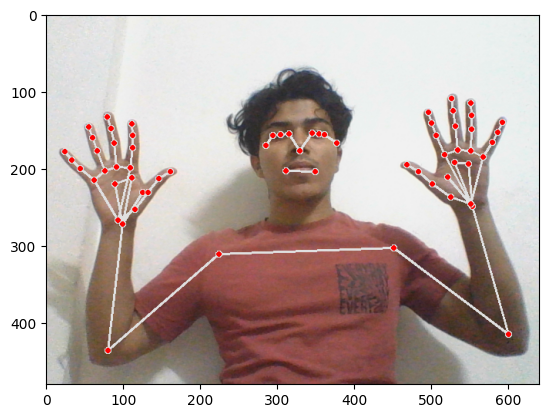

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [17]:
len(results.left_hand_landmarks.landmark) 

21

In [20]:
len(results.right_hand_landmarks.landmark)

21

In [21]:
len(results.pose_landmarks.landmark)

33

In [22]:
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])

In [23]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [24]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
if results.face_landmarks :
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
else :
    np.zeros(1404)


In [27]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [28]:
result_test = extract_keypoints(results)

In [29]:
result_test.shape

(1662,)

In [30]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.51433712,  0.36931917, -0.89037788, ...,  0.03799425,
        0.37243894, -0.05013877])

In [31]:
data_path = os.path.join('UI_Data') 
actions = np.array(['volume up', 'volume down', 'bluetooth'])
no_sequences = 40
sequence_length = 40

In [27]:
# 3 actions, with 30 videos ,each will have 30 frames, multipled by 75 keypoints = 2,02,500 keypoints total

In [33]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(data_path, action, str(sequence)))
        except:
            pass

In [29]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:

        for sequence in range(no_sequences):

            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}q'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [29]:
cap.release()
cv2.destroyAllWindows()

In [35]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical 
label_map = {label:num for num, label in enumerate(actions)} 

In [36]:
label_map 

{'volume up': 0, 'volume down': 1, 'bluetooth': 2}

In [38]:
sequences, labels = [], [] 
for action in actions:
    for sequence in range(no_sequences): 
        window = [] 
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num))) 
            window.append(res)
        sequences.append(window) 
        labels.append(label_map[action])

In [43]:
np.array(sequences).shape #90 videos with 30 frames each with 75 capture points

(120, 40, 1662)

In [42]:
np.array(labels).shape

(120,)

In [44]:
X = np.array(sequences)

In [45]:
X.shape

(120, 40, 1662)

In [46]:
y = to_categorical(labels).astype(int) 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05) 

In [48]:
X_train.shape

(114, 40, 1662)

In [49]:
y_train.shape

(114, 3)

In [50]:
X_test.shape

(6, 40, 1662)

In [51]:
y_test.shape

(6, 3)

In [52]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard 

In [53]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [54]:
model = Sequential()  
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(40,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) 

In [56]:
res = [.7, 0.2, 0.1]

In [57]:
actions[np.argmax(res)]

'volume up'

In [58]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) 

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 40, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [61]:
res = model.predict(X_test)

1/1 [==============================] - 0s 354ms/step


In [62]:
actions[np.argmax(res[2])]

'volume down'

In [63]:
actions[np.argmax(y_test[2])]

'volume down'

In [64]:
model.save('action.h5')

In [65]:
model.load_weights('action.h5')

In [66]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [67]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [68]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [69]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 2],
        [2, 1]],

       [[3, 1],
        [1, 1]],

       [[4, 1],
        [1, 0]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

In [74]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60.0+num*40), (int(prob*100), int(90.0+num*40)), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [77]:
!pip install keyboard

     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ------------- ------------------------ 20.5/58.1 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 771.9 kB/s eta 0:00:00


In [79]:
import pyautogui
import keyboard 
import time

In [80]:
def bluetooth():
    # time.sleep(5)
    # print(pyautogui.position())
    keyboard.press_and_release('windows+a')
    time.sleep(2)
    pyautogui.click(x=1679, y=513)

In [68]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)  
        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])  
            if actions[np.argmax(res)]=='bluetooth':{
                blue()
                }
            elif actions[np.argmax(res)]=='volumeup':{
                 pyautogui.press('volumeup')
                 }
            
            elif actions[np.argmax(res)]==('volumedown'):{
                 pyautogui.press('volumedown')
                 }

            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 1 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 1 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


: 

In [ ]:
cap.release()
cv2.destroyAllWindows()